[View in Colaboratory](https://colab.research.google.com/github/bengHak/CNNAE/blob/master/CnnAutoEncoder.ipynb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.046272529 epoch_time:  6.247029 seconds
Epoch: 0002 cost = 0.023232238 epoch_time:  5.508931 seconds
Epoch: 0003 cost = 0.019424626 epoch_time:  5.526248 seconds
Epoch: 0004 cost = 0.017715075 epoch_time:  5.567923 seconds
Epoch: 0005 cost = 0.016680752 epoch_time:  5.543101 seconds
Epoch: 0006 cost = 0.016001530 epoch_time:  5.544237 seconds
Epoch: 0007 cost = 0.015500067 epoch_time:  5.552163 seconds
Epoch: 0008 cost = 0.015105813 epoch_time:  5.547125 seconds
Epoch: 0009 cost = 0.014790508 epoch_time:  5.540994 seconds
Epoch: 0010 cost = 0.014502838 epoch_time:  5.495883 seconds
Epoch: 0011 cost = 0.014305467 epoch_time:  5.515855 seconds
Epoch: 0012 cost = 0.014129166 epoch_time:  5.531368 seconds
Epoch: 0013 cost = 0.013987007 epoch_

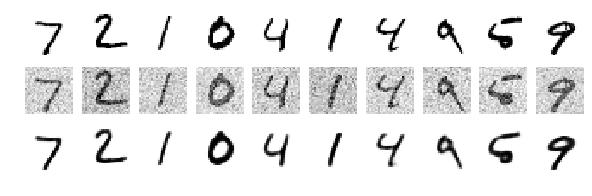

In [2]:
import tensorflow as tf
import random
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

tf.set_random_seed(777)

def makeNoise(origin_data):
    data = origin_data
    
    mean = 0.3
    stddev = 0.2 #표준편차
    noise = np.random.normal(mean, stddev,(batch_size, 28, 28, 1))
    return data + noise
  
def makeNoise2(origin_data):
    data = origin_data
    mean = 0.3
    stddev = 0.2 #표준편차
    noise = np.random.normal(mean, stddev,(784))
    return data + noise
  
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 100
start_time = time.time()

tf.reset_default_graph()

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

#input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
X_img_noise = makeNoise(X_img)
#Y = tf.placeholder(tf.float32, [None, 10])

#L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.1))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img_noise, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

# L5 Final FC 625 inputs -> 10 outputs 784로 바꿈
W5 = tf.get_variable("W5", shape=[625, 784], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([784]))
logits = tf.nn.sigmoid(tf.matmul(L4, W5) + b5)
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
784로 바꿈
'''
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.pow(X - logits, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    now = time.time()
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 'epoch_time: ', "%f seconds" %(now - start_time))
    start_time = now

print('Learning Finished!')


# Test model and check accuracy

# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

#correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(X, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.next_batch(batch_size)[0], keep_prob: 1}))

# Get one and predict
#r = random.randint(0, mnist.test.num_examples - 1)
#print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
#print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))


#plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
#plt.show()

sample_size = 10

print(mnist.test.images.shape)
sample_batch = mnist.test.images[0:100]
print(sample_batch.shape)


samples = sess.run(logits, feed_dict= { X : sample_batch, keep_prob: 1})

#print(np.max(samples[0]))

fig, ax = plt.subplots(3, sample_size, figsize = (10,3))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[2][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(makeNoise2(mnist.test.images[i]), (28,28)))
    ax[2][i].imshow(np.reshape(samples[i], (28,28)))

new_sample = [(round(x , 3)) for x in samples[0]]
print(new_sample)
dataset = mnist.test.images[0]
new_dataset = [(round(x , 3)) for x in dataset]
print(new_dataset)
plt.show()